본 강좌에서는 간단한 다층 퍼셉트론을 만들어봅니다. 다음과 같은 순서로 진행하겠습니다.

1. 데이터셋 준비하기
1. 모델 구성하기
1. 모델 엮기
1. 모델 학습시키기
1. 모델 평가하기

---

### 데이터셋 살펴보기

피마족 인디언 당뇨병 발병 데이터셋

- 인스턴스 수 : 768개
- 특징 수 : 8가지
- 클래스 수 : 2가지

8가지 특징(1번~8번)과 결과(9번)

1. 임신 횟수
2. 경구 포도당 내성 검사에서 2시간 동안의 혈장 포도당 농도
3. 확장기 혈압 (mm Hg)
4. 삼두근 피부의 접은 두께 (mm)
5. 2 시간 혈청 인슐린 (mu U/ml)
6. 체질량 지수
7. 당뇨병 혈통 함수
8. 나이 (세)
9. 5년 이내 당뇨병이 발병 여부

데이터셋 샘플

    6,148,72,35,0,33.6,0.627,50,1
    1,85,66,29,0,26.6,0.351,31,0
    8,183,64,0,0,23.3,0.672,32,1
    1,89,66,23,94,28.1,0.167,21,0
    0,137,40,35,168,43.1,2.288,33,1
    
좀 더 살펴보면, 양성인 경우가 268개(34.9%), 음성인 경우가 500개(65.1%)이다. 즉 모델이 모두 음성이라고 판별을 한다하더라도 65.1%의 기본 정확도(baseline accuracy)를 달성할 수 있다. 현존하는 최대 정확도는 10-fold 교차검증(cross validataion) 했을 때 77.7%이다.

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

Using Theano backend.


csv 파일은 loadtxt()로 직접 불러올 수 있다.

In [2]:
# load pima indians dataset
dataset = numpy.loadtxt("./warehouse/pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

---

### 모델 구성하기

Dense 클래스를 사용하여 완전 연결 레이어(Fully Connected Layer)를 정의할 수 있다.

- 첫번째 인자 : 뉴런의 수
- 두번째 인자 : 네트워크 가중치(network weight) 초기화 방법
 - uniform : 균등분포 (uniform distribution)의 작은 난수들로 초기화 (0~0.05 사이)
 - normal : 가우시안 분포 (Gaussian distribution)로 생성된 작은 난수들로 초기화 
- 세번째 인자 : 활성화 함수(activation function) 지정
 - relu : rectifier 활성화 함수
 - sigmoid : sigmoid 활성화 함수
 - tanh : tanh 활성화 함수
 
마지막 레이어는 sigmoid 할성화 함수를 사용하는데, 이유는 결과가 0과 1사이로 나오는 것을 보장하며, 양성 클래스의 확률로 쉽게 매핑할 수 있기 때문이다. 또한 0.5 임계치(threshold)을 같은 클래스의 범주형 분류(hard classification)를 할 수 있다.

- 첫번째 은닉층(hidden layer)는 12개 뉴런을 가지고, 8개 입력을 받아들인다.
- 두번째 은닉층은 8개 뉴런을 가진다.
- 마지막 레이어는 클래스를 예측하는 1개의 뉴런을 가진다.

In [3]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu'))
model.add(Dense(8, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

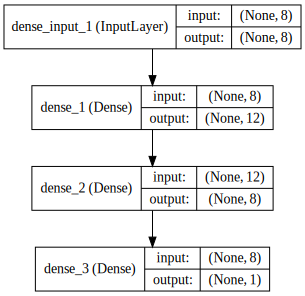

In [4]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

# brew install graphviz
# pip uninstall -y pydot
# pip install pydot-ng

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

![svg]({{ site.baseurl }}/posts_warehouse/2017-2-4-1.svg)

### 모델 엮기

컴파일 시에 정의해야하는 것들
- 가중치 세트를 평가하는 데 사용할 손실함수(loss function)
 - binary_crossentropy : 이진 분류를 위한 logarithmic loss
- 네트워크의 다른 가중치를 검객하는 데 사용되는 최적화 알고리즘
 - adam : 효율적인 경사 하강법(gradient descent) 알고리즘
- 학습과정에서 수집하기 싶은 측정 기준

In [5]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### 모델 학습시키기

- nb_epoch : 데이터셋에 대한 반복 횟수
- batch_size : 네트워크에서 가중치 개갱신 전에 평가되는 인스턴스의 수

In [6]:
# Fit the model
model.fit(X, Y, nb_epoch=10, batch_size=10) # nb_epoch 150

Epoch 1/10
768/768 [==============================] - 0s - loss: 0.6826 - acc: 0.6328     
Epoch 2/10
768/768 [==============================] - 0s - loss: 0.6590 - acc: 0.6510     
Epoch 3/10
768/768 [==============================] - 0s - loss: 0.6475 - acc: 0.6549     
Epoch 4/10
768/768 [==============================] - 0s - loss: 0.6416 - acc: 0.6615     
Epoch 5/10
768/768 [==============================] - 0s - loss: 0.6216 - acc: 0.6745     
Epoch 6/10
768/768 [==============================] - 0s - loss: 0.6128 - acc: 0.6680     
Epoch 7/10
768/768 [==============================] - 0s - loss: 0.6018 - acc: 0.6927     
Epoch 8/10
768/768 [==============================] - 0s - loss: 0.5962 - acc: 0.6927     
Epoch 9/10
768/768 [==============================] - 0s - loss: 0.5991 - acc: 0.6953     
Epoch 10/10
768/768 [==============================] - 0s - loss: 0.5920 - acc: 0.6927     


In [7]:
# evaliuate
scores = model.evaluate(X, Y)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

768/768 [==============================] - 0s     
acc: 70.18%


---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/Keras/2017/01/27/Keras_Lecture_Plan/)
* 이전 : [딥러닝 이야기/레이어 이야기](https://tykimos.github.io/Keras/2017/01/27/Layer_Talk/)
* 다음 : [딥러닝 기본 실습/컨볼루션 신경망 모델 만들어보기](https://tykimos.github.io/Keras/2017/02/04/CNN_Getting_Started/)